# SQCL Quickstart Notebook
## Introduction
This jupyter notebook explains the fundamentals of using this quantum circuit library step by step. 

## Prerequisites
This library uses numpy version earlier than 2 and pytorch. If numpy or pytorch is not installed on your system you can easily install them by using the following command:

`pip install numpy<=2.0 torch torchvision torchaudio`

If you are using google colab, click in the runtime tab on "change runtime type" and choose a gpu. The project will default to a gpu to run faster computations. 

Project initializiton script:

In [35]:
try:
    import google.colab
    if 'colab_cell_executed' not in globals():
        print("Running setup for Google Colab...")
        %cd ~
        %cd ./../content/
        !git clone https://github.com/Dan7nm/Simple-Quantum-Circuits-Library.git
        %cd Simple-Quantum-Circuits-Library/src
        
        # Set the flag to indicate this cell has been executed
        colab_cell_executed = True
    else:
        print("Colab setup has already been executed.")
except ImportError:
    if 'local_cell_executed' not in globals():
        print("Running setup for local machine...")
        # run this line
        import os 
        os.chdir("../../../src/")
        print("Python path:",os.getcwd())
        local_cell_executed = True
    else:
        print("Python directory was already initialized.")

Python directory was already initialized


## Qubit class
This class constructs a single qubit. The constructer of this class is given two complex numbers, alpha and beta, which are the amplitudes of the zero state and one state respectively. 
Let's construct a zero state ,a one state qubits and a qubit with equal amplitudes:

In [36]:
from qubit import Qubit
import numpy as np

q0 = Qubit(alpha=1,beta=0)
q1 = Qubit(alpha=0,beta=1)
q2 = Qubit(alpha= 1/np.sqrt(2),beta= 1/np.sqrt(2))

Note that the amplitudes have to respect the normalization of the quantum state otherwise the class will throw an error.

Now let's print the qubit in different forms to show the quantum state of the qubit:

In [37]:
# Tensor form more readable:
q0.print_qubit()
q1.print_qubit()
q2.print_qubit()
# Vector form for debugging and backend of the library.
q0.print_vector_form()
q1.print_vector_form()
q2.print_vector_form()

Qubit state is 1.00|0⟩
Qubit state is 1.00|1⟩
Qubit state is 0.71|0⟩ + 0.71|1⟩
[1 0]
[0 1]
[0.70710678 0.70710678]


We can change the amplitudes using the set amplitudes method. Remember to respect the normalization condition.


In [38]:
q2.set_amplitudes(alpha=1,beta=0)

There are also getter function for the amplitudes and for the qubit vector.

In [39]:
print(q2.get_alpha())
print(q2.get_beta())
print(q2.get_vector())

1
0
[1 0]


We can measure a qubit using the measure method. By measuring we collapse to one of the two qubit states. The state to which the qubit collapsed is then returned by the method. Let's se an example:

In [40]:
# Initialize a qubit with 1/4 to collapse to the zero state and 3/4 to collpase to one state:
q2 = Qubit(alpha = 1/2,beta = np.sqrt(3)/2)

# Print the qubit:
q2.print_qubit()

# Perform a measurment:
q2.measure()

Qubit state is 0.50|0⟩ + 0.87|1⟩


1

If we rerun the cell above mutliple times we will get zero state with probability 1/4 and one state with probability 3/4.

## MultiQubit Class
This class let's you construct a tensor product of multiple qubits, used later as an input to the quantum circuit.
Let's construct a MultiQubit object:

In [41]:
from multi_qubit import MultiQubit
mt = MultiQubit()

Now let's add a few qubits to this tensor product:

In [42]:
mt.add_qubit(q0)
mt.add_qubit(q1)
mt.add_qubit(q1)

As before in a single qubit case, we can print the tensor product of multiple qubits in tensor form and in vector form:



In [43]:
mt.print_tensor_form()
mt.print_vector_form()

Tensor product in computational basis state form: |011⟩
The vector of the tensor product is: [0 0 0 1 0 0 0 0]


This class also has getters for the tensor product vector and the number of qubits in the tensor product:

In [44]:
print(mt.get_number_of_qubits())
print(mt.get_tensor_vector())

3
[0 0 0 1 0 0 0 0]


We can perform a measurment on the tensor product of qubits and collapse to one of the states. The measurement is simulated using a randomized number in a uniform distributation between 0 and 1. Each state has it's own interval between 0 and 1. The randomized number determines the interval and the state we collapsed to. Let's show an example: 

In [45]:
# Initialize a two qubit tensor with equal probability for each state:
vector = np.full(4,1/2)
mt = MultiQubit(vector)

# Let's print the state:
mt.print_tensor_form()

# Perform a mesurement:
mt.measure()

Tensor product in computational basis state form: 0.5|00⟩ + 0.5|01⟩ + 0.5|10⟩ + 0.5|11⟩


'10'

We can plot the probabilites and amplitudes for each states directly from the state amplitudes:

Tensor product in computational basis state form: 0.5|00⟩ + 0.866|10⟩


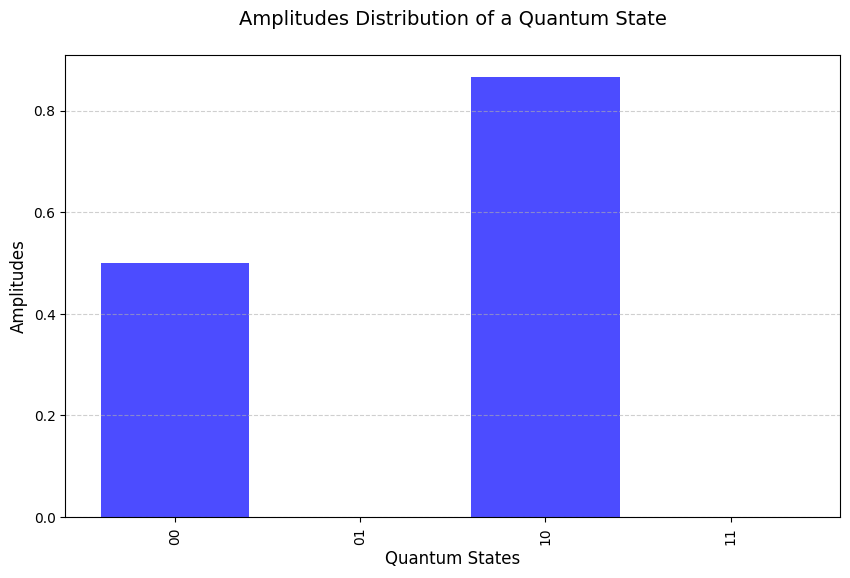

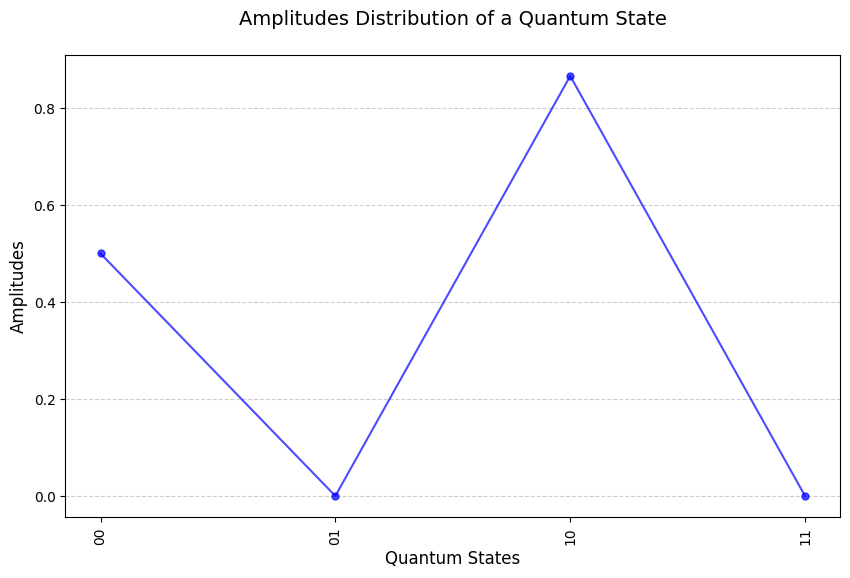

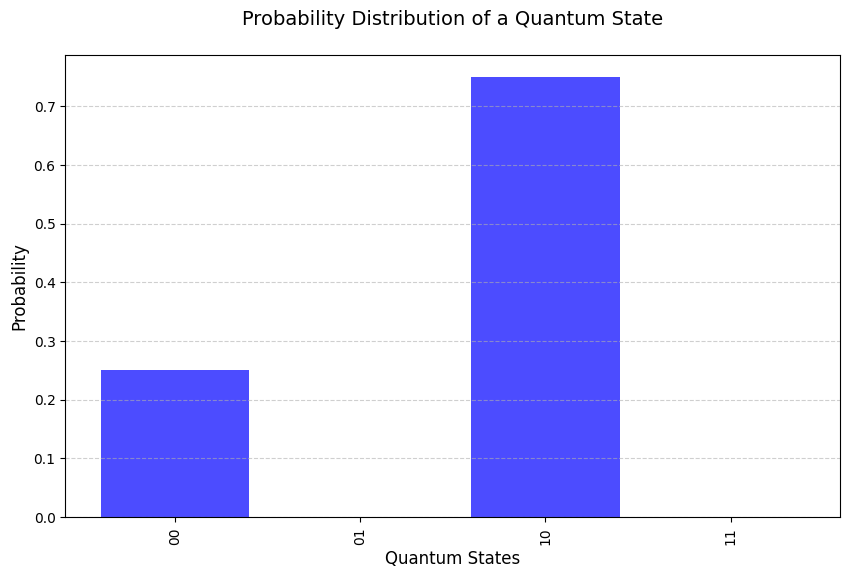

In [46]:
# Initialize a qunatum state using two qubits with different amplitudes:
q0 = Qubit(alpha = 1/2,beta = np.sqrt(3)/2)
q1 = Qubit(alpha = 1,beta = 0)
mt = MultiQubit()
mt.add_qubit(q0)
mt.add_qubit(q1)

# Print the state:
mt.print_tensor_form()

# Plot the quantum state amplitudes using a bar:
mt.plot_amplitudes(plot_type="bar")

# Plot the quantum state amplitudes using a line (Use full for large quantum states):
mt.plot_amplitudes(plot_type="line")

# Plot the quantum state probabilities:
mt.plot_probabilities()

We can simulate multiple measurements as discussed before. We plot the measurements in a graph. We can set the number of measurements, the higher the number the closer we will get the actual probability distribution:

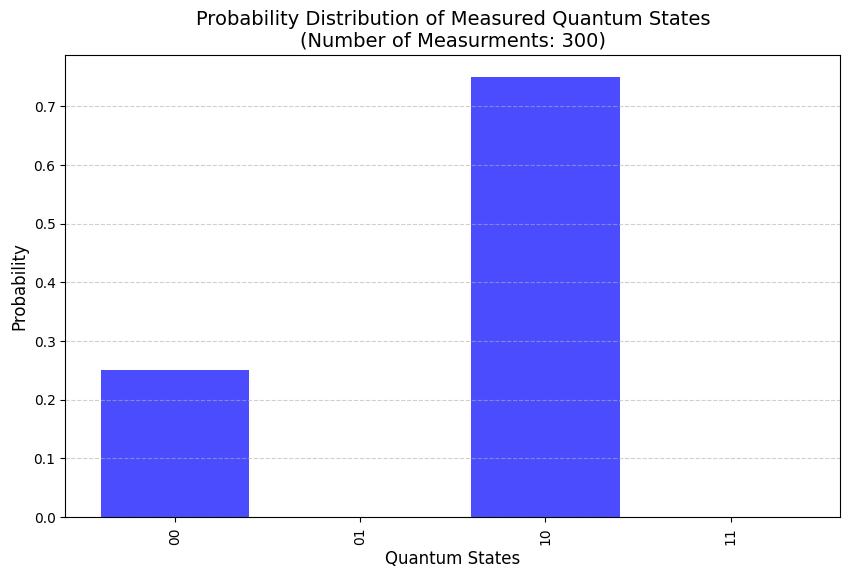

In [47]:
# Plot the measurements:
mt.plot_measurements(num_of_measurements=300)

Another useful feature of this class is tracing out a qubit. Using the get_qubit method we can give the method the desired qubit index and the method will return a Qubit object with it's amplitudes. This is usefull in quantum dynamical circuits where we want to measure a single qubit in a multi qubit quantum state. Let's show an example:

In [48]:
# Trace out the first qubit:
first_qubit = mt.get_qubit(qubit_index=0)

# Print the qubit state:
first_qubit.print_qubit()

# Trace out the second qubit:
second_qubit = mt.get_qubit(qubit_index=1)

# Print the qubit state:
second_qubit.print_qubit()

Qubit state is 0.50|0⟩ + 0.87|1⟩
Qubit state is 1.00|0⟩


We can see the traced out qubits have the same amplitudes as we initialized them before without saving the original qubit amplitudes.
Note that the traced out qubits will only have the same probability and any phases will be lost due to this implementation. This is not a worry cause we only need the probabilities.

The following method measures the multi qubit quantum state on a specific qubit and returns the collapsed state. Lets show two examples:

In [49]:
# Initialize a quantum state of two qubits with equal amplitudes:
vector = np.full(4,1/2)
mt = MultiQubit(vector)
mt.print_tensor_form()

# Perform a measurement on the first qubit:
result = mt.measure_qubit(qubit_index=0)
result.print_tensor_form()

Tensor product in computational basis state form: 0.5|00⟩ + 0.5|01⟩ + 0.5|10⟩ + 0.5|11⟩
Tensor product in computational basis state form: 0.7071|10⟩ + 0.7071|11⟩


If we run the cell a couple of times we will get the first qubit in 0 state with 1/2 probabilty and 1 state with the same probability as expected.
Let's show another example of 4 qubits where each qubit is measured consecutively.  

In [50]:
# Initialize 4 qubits with equal amplitudes:
vector = np.full(16,1/4)
mt = MultiQubit(vector)
mt.print_tensor_form()
# Measure each qubit in order and print the collapsed state:
for i in range(4):
    mt = mt.measure_qubit(i)
    mt.print_tensor_form()

Tensor product in computational basis state form: 0.25|0000⟩ + 0.25|0001⟩ + 0.25|0010⟩ + 0.25|0011⟩ + 0.25|0100⟩ + 0.25|0101⟩ + 0.25|0110⟩ + 0.25|0111⟩ + 0.25|1000⟩ + 0.25|1001⟩ + 0.25|1010⟩ + 0.25|1011⟩ + 0.25|1100⟩ + 0.25|1101⟩ + 0.25|1110⟩ + 0.25|1111⟩
Tensor product in computational basis state form: 0.3536|1000⟩ + 0.3536|1001⟩ + 0.3536|1010⟩ + 0.3536|1011⟩ + 0.3536|1100⟩ + 0.3536|1101⟩ + 0.3536|1110⟩ + 0.3536|1111⟩
Tensor product in computational basis state form: 0.5|1000⟩ + 0.5|1001⟩ + 0.5|1010⟩ + 0.5|1011⟩
Tensor product in computational basis state form: 0.7071|1000⟩ + 0.7071|1001⟩
Tensor product in computational basis state form: |1000⟩


## Quantum Circuit Class
The QuantumCircuit class allows for building a quantum circuit. By adding and removing a quantum gates on every qubit at each vertical and horizontal axis. Every iteration from left to right is described by layers. Each layer is compromised of a tensor product of single qubit gates or controlled gates or swap gates.

Let's construct a quantum circuit object with 3 qubits and add a NOT gate to the first qubit. 
The constructer recieves the number of qubits in the circuit. Then we use add_single_qubit_gate method which recieves target_qubit, layer_index, gate type and phase as arguments. Gate types are: I - identity gate, X - X Gate, Y - Y gate, Z - Z gate, H - Hadamard gate.

Note that the target index and layer index are counted from 0.

In [51]:
from circuit import QuantumCircuit
circuit = QuantumCircuit(number_of_qubits=3)
circuit.add_single_qubit_gate(0,0,"X")

Now let's visualize the circuit to see the construction. You can specify true for visualizing in matplotlib or false for CLI. Matplotlib is reccomended and will be used by default.

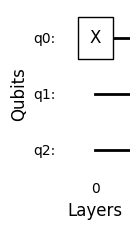

In [52]:
circuit.draw_circuit(matplotlib=True)

The quantum circuit class initializes a two dimensional array. Every row of the array corresponds to each layer and every column to every gates in that layer. When we apply the circuit on an input or want to print the total unitary operation on the input state, the class computes all of the gate matrices into one unitary matrix.

Let's print this circuit's final matrix:

In [53]:
circuit.print_operator_matrix()

[[0.+0.j 0.+0.j 0.+0.j 0.+0.j 1.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 1.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 1.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 1.+0.j]
 [1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]]


Now let's introduce how we can apply the circuit on an input state. Note that the input state which is a tensor product must have the same number of qubits as the circuit otherwise a ValueError will be raised. Here's an example:

In [54]:
# Initialize a quantum state of 011:
vector = np.array([0,0,0,1,0,0,0,0])
mt = MultiQubit(vector=vector)
# Print the input quantum state:
print("The input state:")
mt.print_tensor_form()

result = circuit.run_circuit(mt)
print("The output state:")
result.print_tensor_form()

The input state:
Tensor product in computational basis state form: |011⟩
The output state:
Tensor product in computational basis state form: |111⟩


We took the 011 state and got the 111 state which is what we expect to see with a NOT gate acting on a qubit.

If we want to reset the circuit to the intial state we can use the following method:

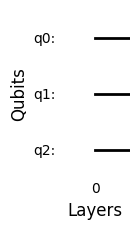

In [55]:
circuit.reset_circuit()
circuit.draw_circuit()

The circuit is now reset as expected.

Now let's introduce controlled gates. To add a controlled gate, use the add_controlled_qubit_gate method and we apply on the input state:

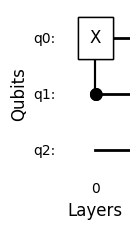

Tensor product in computational basis state form: |011⟩
Tensor product in computational basis state form: |111⟩


In [56]:
circuit.add_controlled_qubit_gate(0, 0, 1, 'X')  # Add a controlled-X gate with control on qubit 1 and target qubit 0 in layer 0
circuit.draw_circuit()

# The input state:
mt.print_tensor_form()
result = circuit.run_circuit(mt)
# Output state
result.print_tensor_form()

The number after the circle shows the qubit index to which it's connected. This is used for situations where many control qubits are in the same layer for easier readability.

Now let's introduce the swap gates which are constructed in a similar fashion such as the controlled qubit gate.

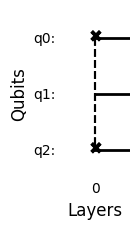

Tensor product in computational basis state form: |011⟩
Tensor product in computational basis state form: |110⟩


In [57]:
circuit.reset_circuit()
circuit.add_swap_gate(0,2,0)
circuit.draw_circuit()

# The input state:
mt.print_tensor_form()
result = circuit.run_circuit(mt)
# Output state
result.print_tensor_form()

Note that when given indexes with an already gate assigned to that index, a ValueError will be raised.

We can add layers to this quantum circuit and similarly also remove layers using these methods:

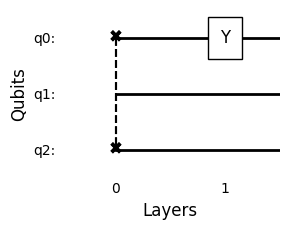

Input state:
Tensor product in computational basis state form: |011⟩
Output state:
Tensor product in computational basis state form: 1j|111⟩


In [58]:
circuit.add_layer()
circuit.add_single_qubit_gate(0,1,"Y")
circuit.draw_circuit()

# The input state:
print("Input state:")
mt.print_tensor_form()

result = circuit.run_circuit(mt)
# The output state:
print("Output state:")
result.print_tensor_form()

We also can define to which layer we want to apply the state (By default we apply the input state on the whole circuit):

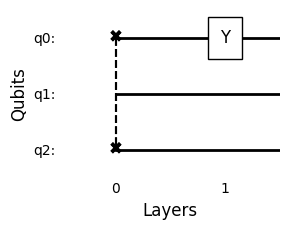

Input state:
Tensor product in computational basis state form: |011⟩
Output state:
Tensor product in computational basis state form: 1j|111⟩


In [59]:
circuit.draw_circuit()

# The input state:
print("Input state:")
mt.print_tensor_form()

result = circuit.run_circuit(mt)
# The output state:
print("Output state:")
result.print_tensor_form()

Removing layers is done this way (you can specify which layer to remove, if no layer is specified then the last layer will be removed):


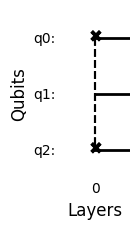

In [60]:
circuit.remove_layer()
circuit.draw_circuit()

To remove specific two qubit gate we can use the following method:

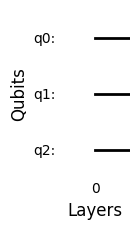

In [61]:
circuit.remove_two_qubit_gate(0,2,0)
circuit.draw_circuit()

Now let's add a single qubit gate with a phase and show how to remove it:

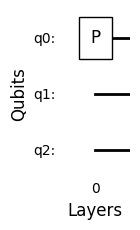

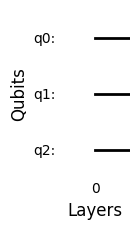

In [62]:
circuit.add_single_qubit_gate(0,0,"P", np.pi)
circuit.draw_circuit()

circuit.remove_single_qubit_gate(0,0)
circuit.draw_circuit()

Now for the crown jewel of this library the Quantum Fourier Transform. The library has built in preset of qft circuit by the number of qubits:

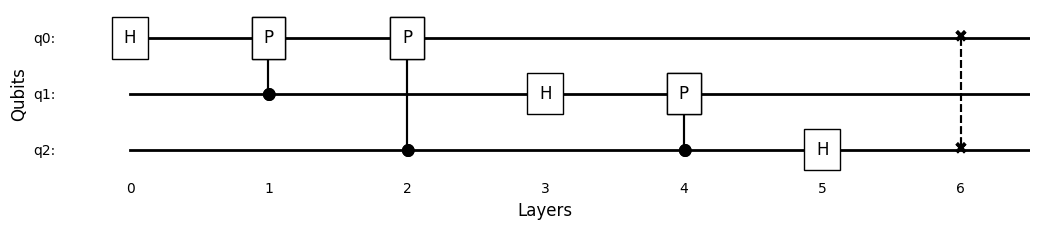

Tensor product in computational basis state form: |011⟩
Tensor product in computational basis state form: 0.3536|000⟩ - (0.25-0.25j)|001⟩ - 0.3536j|010⟩ + (0.25+0.25j)|011⟩ - 0.3536|100⟩ + (0.25-0.25j)|101⟩ + 0.3536j|110⟩ - (0.25+0.25j)|111⟩


In [63]:
circuit.load_qft_preset()
circuit.draw_circuit()

# The input state:
mt.print_tensor_form()
result = circuit.run_circuit(mt)
# Output state
result.print_tensor_form()

The qft matrix we see is:

In [64]:
circuit.print_operator_matrix()

[[ 3.53553391e-01+0.j          3.53553391e-01+0.j
   3.53553391e-01+0.j          3.53553391e-01+0.j
   3.53553391e-01+0.j          3.53553391e-01+0.j
   3.53553391e-01+0.j          3.53553391e-01+0.j        ]
 [ 3.53553391e-01+0.j          2.50000000e-01+0.25j
   2.16489014e-17+0.35355339j -2.50000000e-01+0.25j
  -3.53553391e-01+0.j         -2.50000000e-01-0.25j
  -2.16489014e-17-0.35355339j  2.50000000e-01-0.25j      ]
 [ 3.53553391e-01+0.j          2.16489014e-17+0.35355339j
  -3.53553391e-01+0.j         -2.16489014e-17-0.35355339j
   3.53553391e-01+0.j          2.16489014e-17+0.35355339j
  -3.53553391e-01+0.j         -2.16489014e-17-0.35355339j]
 [ 3.53553391e-01+0.j         -2.50000000e-01+0.25j
  -2.16489014e-17-0.35355339j  2.50000000e-01+0.25j
  -3.53553391e-01+0.j          2.50000000e-01-0.25j
   2.16489014e-17+0.35355339j -2.50000000e-01-0.25j      ]
 [ 3.53553391e-01+0.j         -3.53553391e-01+0.j
   3.53553391e-01+0.j         -3.53553391e-01+0.j
   3.53553391e-01+0.j       

This is unreadable because of floating inaccuracies and large matrix.
In the next section we implement circuit tests to see if the resulting matrix corresponds to the expected qunatum fourier transform matrix.

Here's another example of a qft circuit on a 5 qubit system, showing that the qft circuit can be loaded on any number of qubits:

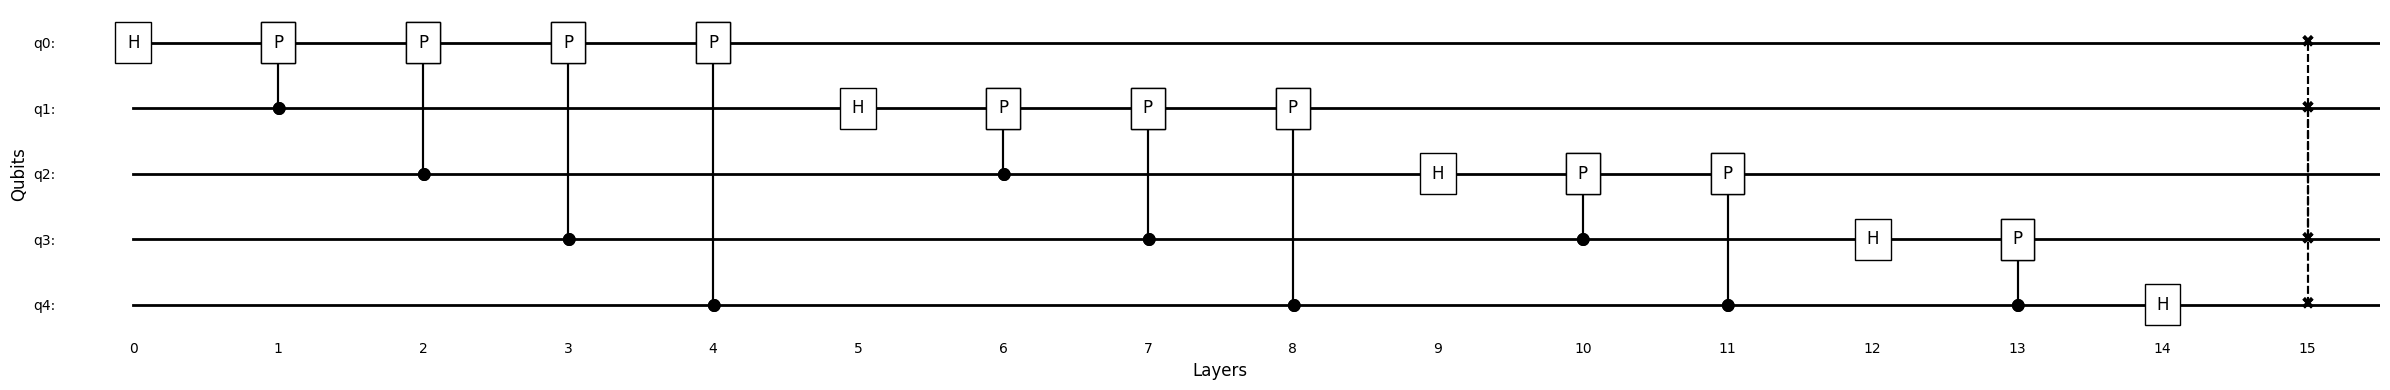

Input State:
Tensor product in computational basis state form: |10011⟩
Output State:
Tensor product in computational basis state form: 0.1768|00000⟩ - (0.147+0.09821j)|00001⟩ + (0.06765+0.1633j)|00010⟩ + (0.03449-0.1734j)|00011⟩ - (0.125-0.125j)|00100⟩ + (0.1734-0.03449j)|00101⟩ - (0.1633+0.06765j)|00110⟩ + (0.09821+0.147j)|00111⟩ - 0.1768j|01000⟩ - (0.09821-0.147j)|01001⟩ + (0.1633-0.06765j)|01010⟩ - (0.1734+0.03449j)|01011⟩ + (0.125+0.125j)|01100⟩ - (0.03449+0.1734j)|01101⟩ - (0.06765-0.1633j)|01110⟩ + (0.147-0.09821j)|01111⟩ - 0.1768|10000⟩ + (0.147+0.09821j)|10001⟩ - (0.06765+0.1633j)|10010⟩ - (0.03449-0.1734j)|10011⟩ + (0.125-0.125j)|10100⟩ - (0.1734-0.03449j)|10101⟩ + (0.1633+0.06765j)|10110⟩ - (0.09821+0.147j)|10111⟩ + 0.1768j|11000⟩ + (0.09821-0.147j)|11001⟩ - (0.1633-0.06765j)|11010⟩ + (0.1734+0.03449j)|11011⟩ - (0.125+0.125j)|11100⟩ + (0.03449+0.1734j)|11101⟩ + (0.06765-0.1633j)|11110⟩ - (0.147-0.09821j)|11111⟩


In [65]:
q0 = Qubit(1,0)
q1 = Qubit(0,1)
mt = MultiQubit()
mt.add_qubit(q1)
mt.add_qubit(q0)
mt.add_qubit(q0)
mt.add_qubit(q1)
mt.add_qubit(q1)

circuit = QuantumCircuit(number_of_qubits=5)
circuit.load_qft_preset()
circuit.draw_circuit()
print("Input State:")
mt.print_tensor_form()
result = circuit.run_circuit(mt)
print("Output State:")
result.print_tensor_form()

## Quantum Circuits Tests
We saw before that large matrices are unreadable for us. In such case we implement tests which compare the computed matrix with the expected matrix from theory.

First let's check if the computed QFT matrix is as expected. From theory the expected value of each cell i,j in the QFT matrix is as follows:

$$
\begin{equation}
QFT_{m,n} = \frac{1}{\sqrt{N}} e^{\frac{i 2\pi}{N} \cdot mn} ; N = 2^{\text{number of qubits}}
\end{equation}
$$

This function compares between the ouput matrices of this library and theory on 2 to a specified number of qubits as input and outputs the runtime:

In [66]:
# Import the test functions:
from circuit_test import *

test_qft_matrix_output(qubits_to_test=8)

===== QFT test with 2 qubits runtime: 0.00 ======
===== QFT test with 3 qubits runtime: 0.00 ======
===== QFT test with 4 qubits runtime: 0.00 ======
===== QFT test with 5 qubits runtime: 0.01 ======
===== QFT test with 6 qubits runtime: 0.01 ======
===== QFT test with 7 qubits runtime: 0.03 ======
===== QFT test with 8 qubits runtime: 0.27 ======
==== Total QFT Test runtime: 0.63 seconds =======
=============== QFT tests passed! ===============


Another example is the sine function. We know that the classical Fourier Transform of a sine function gives us two delta of dirac functions. The qft_on_sine function plots a normalized sine function ampitudes, then plots measurements of the resulting state and lastly compares to the expected fourier transform result. Let's show this in use: 

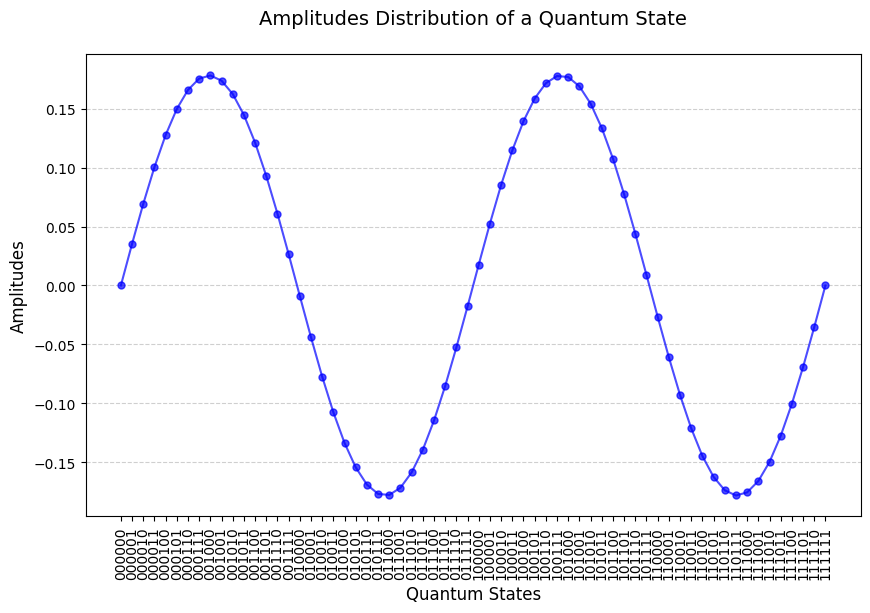

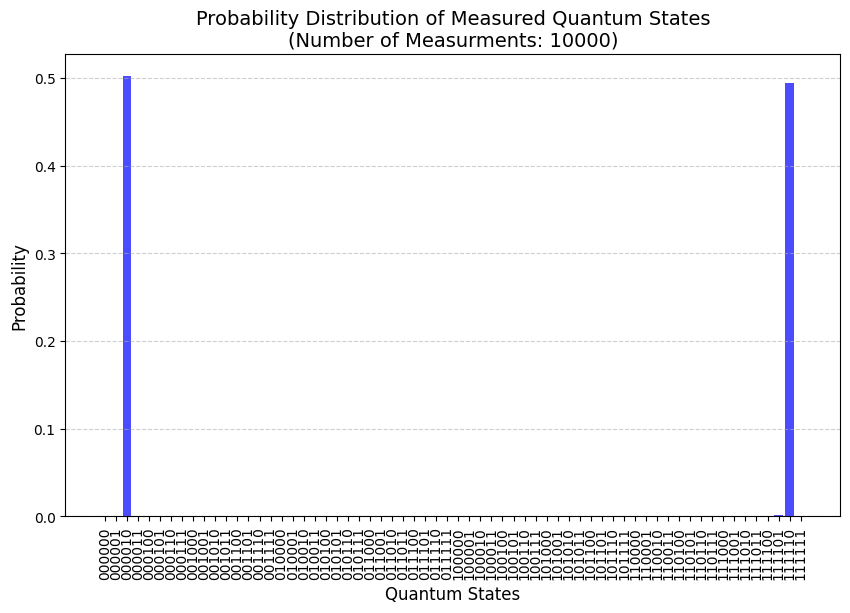

=== QFT Test on a Sine function passed ===
=== The runtime of QFT on a sine function is: 1.78 seconds ===



In [67]:
qft_on_sine(number_of_qubits=6)

Another test checks the correctness of the traced out qubits from a multi qubit quantum state. The test initializes a specified number of qubits with normalized and random amplitudes and save the original amplitudes for each qubit. Then we initialize the tensor product of these qubits. Then we trace out each qubit and compare the traced out qubit's amplitudes to the corresponding original qubit. Let's see this in action:

In [68]:
test_tracing_out_qubit(qubits_to_test=2, print_amplitudes=True)

 Original qubits amplitudes [(0.9678715978193544, 0.2514449644248415), (0.5703237432307374, 0.8214200070045043)]
 Traced out qubits amplitudes [(0.9678715978193544, 0.2514449644248415), (0.5703237432307373, 0.8214200070045042)]
==== The traced out qubits real amplitudes are the same as their original real amplitudes. ==== 
